<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk12_Python_PowerBI_refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extend PowerBI Capabilities using Python

## Connect to Data using Python Scripts

![get data Python scripts](https://github.com/Dong2Yo/Dataset/raw/main/getdate_python.GIF)

### Predict Profits (Time Series - ARIMA)

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read the orders.csv file into a Pandas DataFrame
df = pd.read_csv(r'https://raw.githubusercontent.com/Dong2Yo/Dataset/main/orders.csv')

# Convert the "Order Date" column to a datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group the data by month and calculate the sum of profits for each month
df_monthly = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Profit'].sum().reset_index()

# Fit an ARIMA model to the profit data
model = ARIMA(df_monthly['Profit'], order=(1,1,1))
results = model.fit()

# Predict the profits for the next 12 months using the ARIMA model
forecast = results.forecast(steps=12)

# Create a new DataFrame with the forecasted profits
df_forecast = pd.DataFrame({'Order Date': pd.date_range(start=df_monthly['Order Date'].iloc[-1], periods=12, freq='M'),
                            'Profit Forecast': forecast})

# Merge the original data with the forecasted data
df_merged = pd.merge(df_monthly, df_forecast, on='Order Date', how='outer')

# Save the merged data to a new CSV file
df_merged.to_csv('orders_arima.csv', index=False)


### Predict Profits (Time Series - SARIMAX)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
df = pd.read_csv(r'https://raw.githubusercontent.com/Dong2Yo/Dataset/main/orders.csv', parse_dates=['Order Date'])

# Convert the data to a time series
ts = df.groupby(['Order Date'])['Profit'].sum().resample('D').sum()

# Define the SARIMA model
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))

# Fit the model
results = model.fit()

# Make predictions for the next 365 days
forecast = results.forecast(365)

# Create a new DataFrame with the predictions
dates = pd.date_range(start='2015-01-01', end='2015-12-31')
pred_df = pd.DataFrame({'Order Date': dates, ' Predicted Profit': forecast})

# Merge the predicted data with the original data

merged_df = pd.merge(df, pred_df, on='Order Date', how='outer')

# Save the merged data to a new CSV file
merged_df.to_csv('orders_sarimax.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data from a CSV file
df = pd.read_csv(r'https://raw.githubusercontent.com/Dong2Yo/Dataset/main/orders.csv')

# Remove unused columns and rows with missing data
df = df[['Order Date', 'Sales', 'Discount', 'Shipping Cost', 'Quantity', 'Profit']].dropna()

# Convert the date column to a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group the data by month and aggregate the numerical columns by sum
df = df.groupby(pd.Grouper(key='Order Date', freq='MS')).sum().reset_index()

# Define the features and target variable
features = ['Sales', 'Discount', 'Shipping Cost', 'Quantity']
X, y = df[features], df['Profit']

# Train a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create a new dataframe with the dates for the next 12 months
last_date = pd.to_datetime(df['Order Date']).max()
dates = pd.date_range(start=last_date, periods=12, freq='MS')
df_pred = pd.DataFrame({'Order Date': dates})

# Set the other features to the average values in the historical data
df_pred['Sales'] = df['Sales'].mean()
df_pred['Discount'] = df['Discount'].mean()
df_pred['Shipping Cost'] = df['Shipping Cost'].mean()
df_pred['Quantity'] = df['Quantity'].mean()

# Predict the profit for the next 12 months
df_pred['Profit'] = rf.predict(df_pred[features])

# Output the results to a CSV file
df_pred.to_csv('predicted_profit.csv', index=False)


## Transform Data using Python Scripts

1. Load orders.csv data into Power BI

2. Click on "Run Python Script" from the "Transform" tab in the Power Query Editor. Write Python code.

3. CLose and Apply



### Predict Profits (Linear Regression)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the data
df = pd.read_csv(r'https://raw.githubusercontent.com/Dong2Yo/Dataset/main/orders.csv')

# One-hot encode the order priority feature
order_priority = pd.get_dummies(df['Order Priority'], prefix='order_priority')

# Combine the one-hot encoded feature with the discount and shipping cost features
X = pd.concat([df[['Discount', 'Shipping Cost']], order_priority], axis=1)

# Use profit as the target variable
y = df['Profit']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the profit for the next 12 months
predictions = model.predict(X)

# Add the predictions to a new DataFrame with the original "Order Date" column
results = pd.DataFrame({'Order Date': df['Order Date'], 'Profit Prediction': predictions, 'Actual Profit': df['Profit']})

# Print the first 10 rows of the results DataFrame
print(results.head(10))


   Order Date  Profit Prediction  Actual Profit
0   7/31/2012         984.082418       762.1845
1    2/5/2013         949.828494      -288.7650
2  10/17/2013         984.169981       919.9710
3   1/28/2013         978.558399       -96.5400
4   11/5/2013         951.939527       311.5200
5   6/28/2013         922.160130       763.2750
6   11/7/2011         943.232625       564.8400
7   4/14/2012         951.394204       996.4800
8  10/14/2014         895.470875      1906.4850
9   1/28/2012         817.513794     -1862.3124


## Visualize Data using Python Visuals

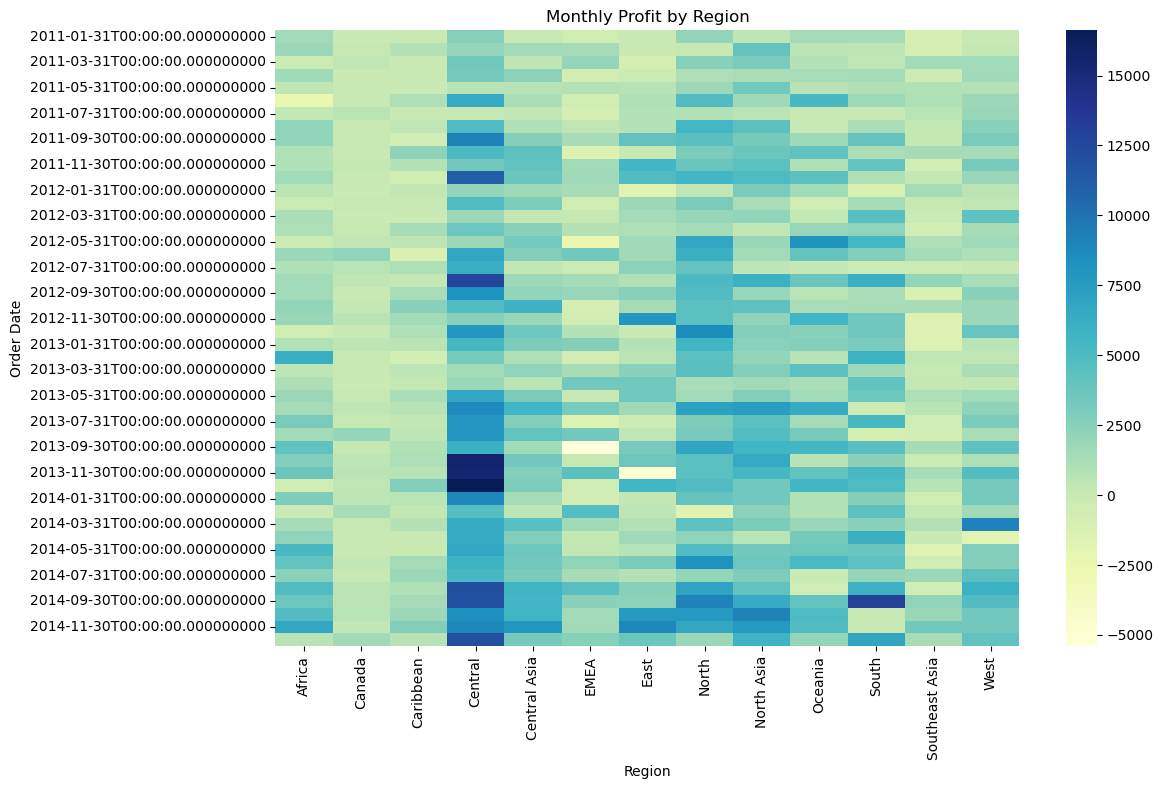

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the orders data and convert Order Date column to datetime format
orders = pd.read_csv(r'https://raw.githubusercontent.com/Dong2Yo/Dataset/main/orders.csv')
orders['Order Date'] = pd.to_datetime(orders['Order Date'])

# Set Order Date column as index
orders = orders.set_index('Order Date')

# Create pivot table to aggregate the data by month and region
pivot = orders.pivot_table(values='Profit', index=orders.index, columns='Region', aggfunc='sum')
pivot = pivot.resample('M').sum()

# Create heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Monthly Profit by Region")
plt.show()
